In [2]:
#https://www.kaggle.com/code/fareselmenshawii/breast-cancer-various-models#notebook-container

In [55]:
import warnings 
warnings.filterwarnings("ignore")

In [56]:
# Import libraries
import seaborn as sns # for data visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # to plot charts
import plotly.express as px
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [57]:
# Data Analysis
# Import dataset
df = pd.read_csv('breast-cancer.csv')
                 
df.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [58]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
df.shape

(569, 32)

In [60]:
# Get familier with dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [62]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [63]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [64]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [65]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [66]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [67]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [68]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [69]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [70]:
#Data Preprocessing
df.drop('id', axis=1, inplace=True)

In [71]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [72]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
df.shape

(569, 31)

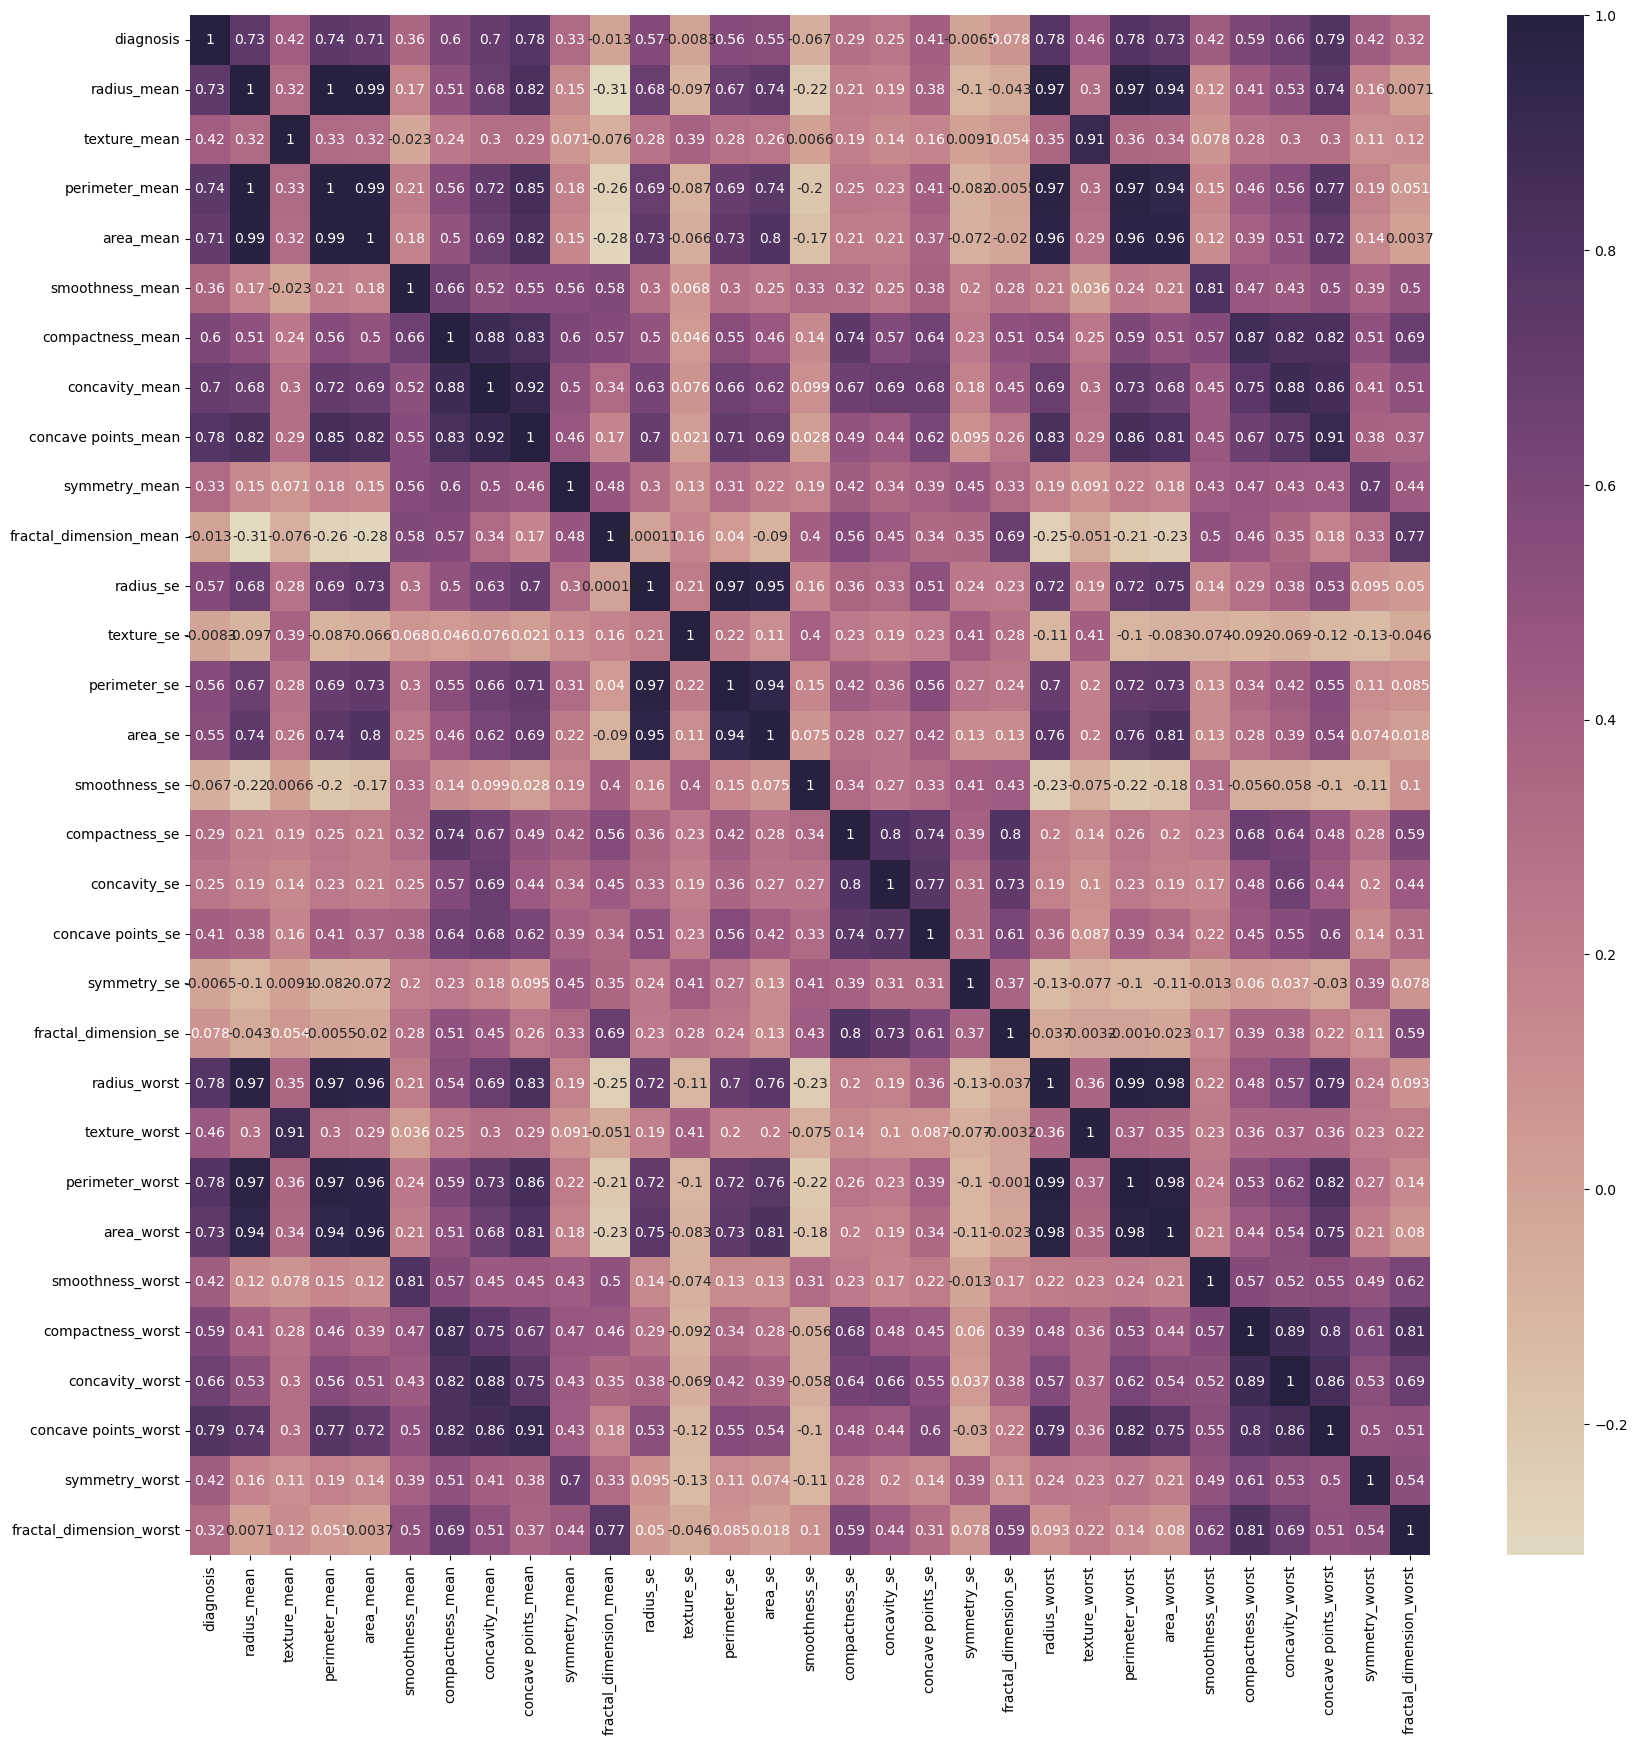

In [74]:
#Correlation
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [75]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

In [76]:
# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

In [77]:
# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

In [78]:
# Drop the target variable from the results
names.remove('diagnosis')

In [79]:
#Define data and labels
X = df[names]
y = df['diagnosis']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

In [81]:
#  breaset cancer مع اجراء بعض التعديلات بما يتناسب مع dibetes بدء من هذه الخلية وحتى الاخير اضافة الاكواد من رابط 
# MLP انا عدلت على الكود بااضافة مودل  
#نحتاجها او استغني عنها ؟
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier",
            "MLPClassifier"
        ] 
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data =
result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.949551,0.030398,LogisticRegression
1,0.904295,0.045294,DecisionTreeClassifier
2,0.891795,0.036086,AdaBoostClassifier
3,0.891859,0.051781,SVC
4,0.949615,0.035997,RandomForestClassifier
5,0.959679,0.032472,GradientBoostingClassifier
6,0.899359,0.034419,KNeighborsClassifier
7,0.919359,0.053998,MLPClassifier


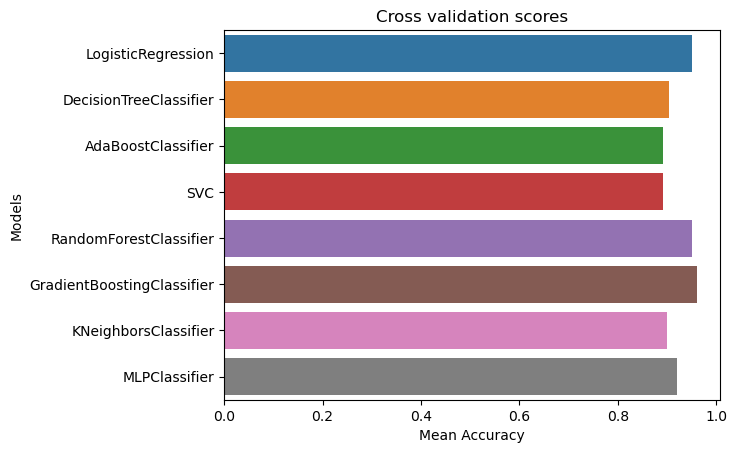

In [82]:
# MLP انا اضفت ال 

# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
    MLPClassifier(),
]     
evaluate_model(models)

In [83]:
# GridSearchCV

def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''
    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, grid_result.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    

In [84]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(X_train, y_train)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)


Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9575
0.958 (+/-0.138) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.953 (+/-0.157) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.948 (+/-0.167) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.950 (+/-0.173) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.943 (+/-0.175) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.945 (+/-0.174) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.935 (+/-0.189) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.925 (+/-0.194) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.935 (+/-0.182) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912 (+/-0.195) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97    

In [85]:
model = SVC()
# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
svc_result = grid_search.fit(X_train, y_train)
# SVC Hyperparameter Result
analyze_grid_result(svc_result)

Tuned hyperparameters: (best parameters)  {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy : 0.9296482412060301
0.905 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.930 (+/-0.030) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.922 (+/-0.035) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.015) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.912 (+/-0.015) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.015) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.905 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.899 (+/-0.030) for {'C': 1, 'kernel': 'linear'}
0.920 (+/-0.040) for {'C': 10, 'kernel': 'linear'}
0.922 (+/-0.015) for {'C': 100, 'kernel': 'linear'}
0.917 (+/-0.005) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1     

In [86]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)
# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
rf_result = grid_search.fit(X_train, y_train)
# RF Hyperparameter Result
analyze_grid_result(rf_result)

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}
Accuracy : 0.9472361809045227
0.945 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.945 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.945 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.945 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.940 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.945 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.940 (+/-0.020) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.942 (+/-0.025) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.940 (+/-0.0

In [87]:
# اضفت مودل جديد

# Create the Gradient Boosting Classifier model
model = GradientBoostingClassifier()

# Define grid search parameters
tuned_parameters = [
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}
]

# Create cross-validation object
cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=cv, scoring='accuracy', error_score=0)
gb_result = grid_search.fit(X_train, y_train)

# Analyze Gradient Boosting Classifier hyperparameter result
analyze_grid_result(gb_result)

Tuned hyperparameters: (best parameters)  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy : 0.9422110552763819
0.930 (+/-0.030) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.935 (+/-0.020) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.942 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.917 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
0.917 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.922 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.920 (+/-0.010) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
0.917 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
0.922 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.932 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.935 (+/-0.030) for {'learning_rate': 0.01, 'max_depth': 3, 

In [88]:
# اضفت مودل جديد
# Create the MLP Classifier model
model = MLPClassifier()

# Define grid search parameters
tuned_parameters = [
    {'hidden_layer_sizes': [(100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['sgd', 'adam']}
]

# Create cross-validation object
cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=cv, scoring='accuracy', error_score=0)
mlp_result = grid_search.fit(X_train, y_train)

# Function to analyze and print grid search results
def analyze_grid_result(result):
    print("Best parameters found:")
    print(result.best_params_)
    print("Best accuracy score found:")
    print(result.best_score_)
    
# Analyze MLP Classifier hyperparameter result
analyze_grid_result(mlp_result)


Best parameters found:
{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best accuracy score found:
0.9195979899497487


In [89]:
# Test predictions
y_pred = logi_result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [90]:
# Test predictions
y_pred = svc_result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [91]:
# Test predictions
y_pred = rf_result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [92]:
# Test predictions
y_pred = gb_result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [93]:
# Test predictions
y_pred = mlp_result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [94]:
'''X_test['pred'] = y_pred
print(X_test)'''

"X_test['pred'] = y_pred\nprint(X_test)"

In [95]:
#اضفتها لتخزين دقة جميع المودلز في جدولاحتمال الغيها  

from tabulate import tabulate
# قائمة المودلز
model_names = [
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    "MLPClassifier"
]

# قائمة المقاييس
accuracy = [0.98, 0.97, 0.96, 0.95, 0.95]

# إنشاء الجدول
table = []
for model, acc in zip(model_names, accuracy):
    table.append([model, acc])

headers = ["Model", "Accuracy"]
print(tabulate(table, headers, tablefmt="simple"))



Model                         Accuracy
--------------------------  ----------
LogisticRegression                0.98
SVC                               0.97
RandomForestClassifier            0.96
GradientBoostingClassifier        0.95
MLPClassifier                     0.95


In [96]:
#https://www.kaggle.com/code/lukkeeee/cancer-analysis-using-different-models#Overview-Models
    # عند تطبيقي لميثود اخراج افضل براميترز للمودل فأن نتائج (الدقة) في التنبؤ بمجموعة الاختبار شبيهة بالنتائج  في هذا الرابط